# Saving Telco Customer Churn

In telecommunications, customers retention is way cheaper than seeking for new customers. 

In order to lead the most valuable retention program, we will determine through Exploratory data analysis who are the more valuable customers by performing a segmentation of the customer database.

After a thorough analysis of the provided data set, we will develop an interpretable machine learning model to predict churn. 

This will allow us to target customers who are more likely to churn and use the insights developed during EDA to propose different strategies for the company to investigate for a potential retention program.

#### Table of contents
* [1. Exploratory Data Analysis](#EDA)
 * [1.2 Data Description](#EDA2)
 * [1.3 Descriptive analysis](#EDA3)
    * [1.3.1 Charges and tenure](#EDA3.1)
    * [1.3.2 Phone services and contracts](#EDA3.2)
    * [1.3.3 Customers segmentation](#EDA3.3)
* [2. Detecting Churn](#ML)
 * [2.1 One-hot encoding](#ML2)
 * [2.2 Data normalization](#ML3)
 * [2.3 Naive Classifiers](#ML4)
 * [2.4 Choice of metric](#ML5)
 * [2.5 Improving the classifier](#ML6)
 * [2.6 Feature Importances](#ML7) 


* [3. Saving Churn problem](#BM)
 * [3.1 Program strategies](#BM2) 
 * [3.2 Simple Business model : simulation](#BM3) 

* [4. Conclusion](#Concl)

## 1. Exploratory Data Analysis <a class="anchor" id="EDA"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
pd.set_option('display.max_columns', None)

### 1.2 Data Description <a class="anchor" id="EDA2"></a>

The given data set contains informations about Telco customers where each row represents a unique customers and the columns are informations regarding customers'services. The column "Churn" indcate whether the customer left the company within the last month.

The source data set can be found here : https://www.kaggle.com/blastchar/telco-customer-churn

In [2]:
customers_df = pd.read_csv('Telco-Customer-Churn.csv')
customers_df = customers_df[customers_df['TotalCharges'] != ' ']
customers_df.TotalCharges = customers_df.TotalCharges.astype('float')
nb_customers = len(customers_df.index)
print('There are a total of %s customers in the dataset among which %s left within the last month.' %(nb_customers, customers_df[customers_df['Churn'] == "Yes"].shape[0]))
churnNB = customers_df['Churn'].value_counts()[1]
churnrate = float(churnNB) / nb_customers
print('The churn rate is {:.2f}%'.format(churnrate*100))

There are a total of 7032 customers in the dataset among which 1869 left within the last month.
The churn rate is 26.58%


In [3]:
customers_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Some statistics regarding numerical values in the data set.

In [4]:
customers_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


All features are categorical variables except MonthlyCharges, TotalCharges and tenure which are continuous variables.

We observe that SeniorCitizen as been listed as a continuous variable by pandas while it contains only 1's and 0's. Hence, we decide to convert it to a categorical variable.

In [5]:
customers_df.SeniorCitizen = customers_df.SeniorCitizen.astype('category')

### 1.3 Descriptive analysis <a class="anchor" id="EDA3"></a>

In order to determine services/features which discriminate loyal customers from the others, we will split the data set and run our analysis separately. 
Throughout this notebook, we will use blue-shaded colors for loyal customers and red-shaded for disloyal ones.

In [6]:
loyal_customers = customers_df[customers_df['Churn'] == "No"]
disloyal_customers = customers_df[customers_df['Churn'] == "Yes"]

**1.3.1 Charges and tenure** <a class="anchor" id="EDA3.1"></a>

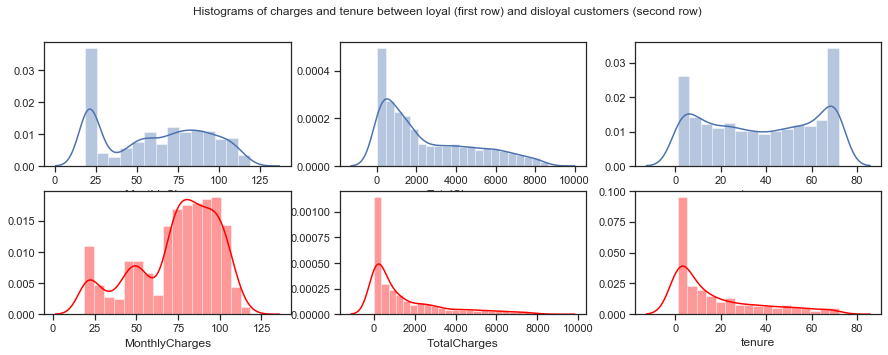

In [7]:
dims = (15, 5)
fig, ax =plt.subplots(2,3,figsize=dims)
plt.suptitle('Histograms of charges and tenure between loyal (first row) and disloyal customers (second row) ')
#loyal customers
sns.distplot(loyal_customers.MonthlyCharges, ax=ax[0, 0])
sns.distplot(loyal_customers.TotalCharges, ax=ax[0, 1])
sns.distplot(loyal_customers.tenure, ax=ax[0,2])
#disloyal customers
sns.distplot(disloyal_customers.MonthlyCharges, ax=ax[1, 0], color='red')
sns.distplot(disloyal_customers.TotalCharges, ax=ax[1, 1], color='red')
sns.distplot(disloyal_customers.tenure, ax=ax[1,2], color='red')
plt.savefig('charges_and_tenure.jpg')

- **Monthly Charges** : We observe that for loyal customers, an important proportion of customers bring between \\$20 and \\$25 each month while disloyal ones tend to pay more important charges, i.e, between \\$50 and \\$100. These figures may indicate that cheap packages are a proxy for customer retention. It may be interesting to determine if they mostly represent students or teenagers rather than Senior citizens as they represent a proportion of the population with lower income.

- **TotalCharges and tenure** : both distribution are heavyskewed. We notice that most of the customers have paid quite low Total amount of Charges. 
In the **first case**, it may be due to the fact that we categorized loyal customers as low-costs ones, mostly. We observe customers with low tenure (less than 12 months = 1 year) which may denote new customers. 
In the **second case**, it may be explained by the fact that most customers leave the company really early (very low tenure).

The histogram highlights that max(tenure) = 72 months (6 years) with a peak frequency on this value. It suggests that the dataset considers that long run customers with tenure > 72 months are included in the dataset with tenure = 72 months. Hence, people with the maximum tenure are considered as acquired customers and retention should not be focused on them. 

**1.3.2 Phone services and contracts** <a class="anchor" id="EDA3.2"></a>

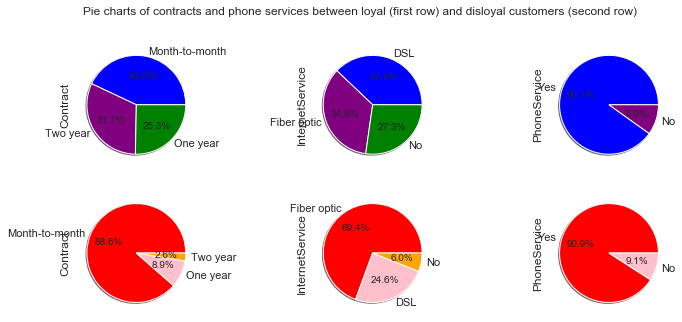

In [8]:
dims = (12, 5)
fig, ax =plt.subplots(2,3,figsize=dims)
plt.suptitle('Pie charts of contracts and phone services between loyal (first row) and disloyal customers (second row) ')
#loyal customers
loyal_customers.Contract.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[0,0], colors = ['blue', 'purple', 'green'])
loyal_customers.InternetService.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[0,1], colors = ['blue', 'purple', 'green'])
loyal_customers.PhoneService.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[0,2], colors = ['blue', 'purple', 'green'])
#disloyal customers
disloyal_customers.Contract.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[1,0], colors = ['red', 'pink', 'orange'])
disloyal_customers.InternetService.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[1,1], colors = ['red', 'pink', 'orange'])
disloyal_customers.PhoneService.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[1,2], colors = ['red', 'pink', 'orange'])
plt.savefig('services and contracts.jpg')

- **Contract** : Loyal customers contracts are quite balanced between month-to-month, One-year and Two-year while a huge proportion (**88.6%**) of disloyal customers chose month-to-month contracts. These are non-binding contracts allowing the customer to leave the company whenever it fits to him. While it may denote something negative, it may also describe two category of customers. First of all, they may represent tourists passing through with the sole need/purpose to use the phone company services for a limited amount of time **or** represent customers in search of a new phone company who try several for a short time. Therefore, it may be worthwhile designing an effective strategy to capture these customers by being more competitive than other telephone companies.

- **Internet Service** : Similarly, internet services are quite balanced among loyal customers while most disloyal ones tend to prefer the Fiber optic option, which is probably the most expensive option, explaining why disloyal customers tend to pay more monthly charges than loyal ones. Furthermore, it is reasonable to think that passing through tourists put more emphasis on the Internet service provided rather than other ones, explaining this choice. An opportunity may be seized at this level.

- **Phone Service** : As expected there is no significant difference regarding the choice of using a phone service or not between the two type of customers since Telco is a phone company, hence most customers requests this company for its phone services mainly.

**1.3.3  Customers Segmentation** <a class="anchor" id="EDA3.3"></a>

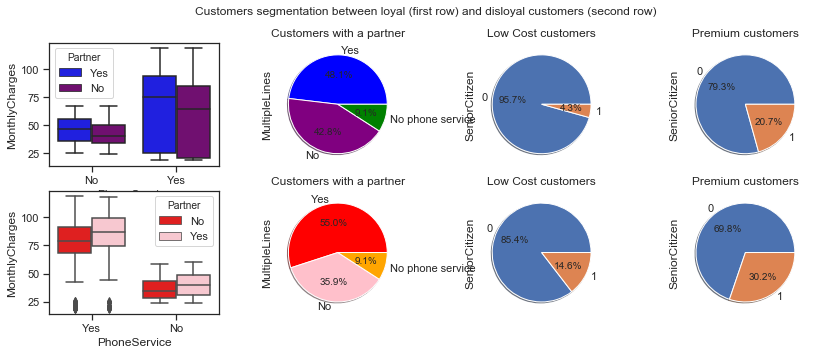

In [9]:
dims = (14, 5)
fig, ax =plt.subplots(2,4,figsize=dims)
plt.suptitle('Customers segmentation between loyal (first row) and disloyal customers (second row) ')
#loyal customers
sns.catplot(x="PhoneService", y="MonthlyCharges", kind="box", hue="Partner", data=loyal_customers, ax=ax[0,0], palette = ['blue', 'purple', 'green'])
loyal_customers[loyal_customers['Partner'] == 'Yes'].MultipleLines.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[0,1], title='Customers with a partner', colors = ['blue', 'purple', 'green'])
loyal_customers[loyal_customers['MonthlyCharges'] < 40].SeniorCitizen.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[0,2], title='Low Cost customers')
loyal_customers[loyal_customers['MonthlyCharges'] > 70].SeniorCitizen.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[0,3], title='Premium customers')
#disloyal customers
sns.catplot(x="PhoneService", y="MonthlyCharges", kind="box", hue="Partner", data=disloyal_customers, ax=ax[1,0], palette = ['red', 'pink', 'orange'])
disloyal_customers[disloyal_customers['Partner'] == 'Yes'].MultipleLines.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[1,1], title='Customers with a partner', colors = ['red', 'pink', 'orange'])
disloyal_customers[disloyal_customers['MonthlyCharges'] < 40].SeniorCitizen.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[1,2], title='Low Cost customers')
disloyal_customers[disloyal_customers['MonthlyCharges'] > 70].SeniorCitizen.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%', ax=ax[1,3], title='Premium customers')
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.savefig('multi_variate.jpg')

In [10]:
print("Proportion of senior citizen in whole database %s" %(customers_df.SeniorCitizen.value_counts().values / customers_df.shape[0]))
print("Proportion of senior citizen among loyal customers %s" %(loyal_customers.SeniorCitizen.value_counts().values / loyal_customers.shape[0]))
print("Proportion of senior citizen among disloyal customers %s" %(disloyal_customers.SeniorCitizen.value_counts().values / disloyal_customers.shape[0]))

Proportion of senior citizen in whole database [0.83759954 0.16240046]
Proportion of senior citizen among loyal customers [0.87100523 0.12899477]
Proportion of senior citizen among disloyal customers [0.74531835 0.25468165]


- **Effect of having a partner and/or a phone services on monthly charges** : On a first hand, we observe that **among loyal customers**, subscribing to a phone service increases monthly charges. Furthermore, it seems that the charges are higher (comparing the median values) when the customer has a client, however the variance is higher when subscribing to a phone service. It is may be explained by the fact that having a Phone service (main service for the company) just service as a basis, and customers monthly charges differenciate themselves from others depending on extra services they choose. We also notice that customers who have a partner tend to pay more than the one who do not. It may be explained by the fact that it may exist some discount family packages rather than individual subscriptions. It is observed in the pie plot, as half of the customers with a partner tend to have multiples lines. On the other hand, we observe the same effects **among disloyal customers** with the slight difference in the fact that the variance is much lower.



- **Which social status are represented by low-cost and premium customers ?** Most low-cost customers are senior citizens in both cases, with a lower proportion among disloyal customers. This may be explained by the fact that young people tend to be more volatile than older ones. Similarly, most premium customers are senior citizens too with a lower proportion among disloyal customers. It is importante to note that the proportion of senior citizen (**83.76%**) in the whole Telco database explains mostly this observation. Furthermore, the difference is not significant between the two subgroups.

## 2. Detecting Churn ! <a class="anchor" id="EDA"></a>

In this part we will develop a ML model to predict customers who are potential *Churn* candidates, in order to take action to change this behavior.

Here is an outline of the successive steps we will take :

- one hot encoding of categorical variables to obtain "machine readable" data.
- Data scaling/normalization/standardization to avoid weights from its dimensions affecting the results
- dimensionnality reduction : we will perform Principal Component Analysis (PCA) here.

### 2.1 One-hot encoding <a class="anchor" id="ML2"></a>

In [11]:
data = customers_df.copy()

#Convert gender to binary and drop redundant column
data["Male"]=data['gender'].map(lambda x : 1  if x =='Male' else 0)
data = data.drop(columns="gender")

#Convert internetService to binary : 1 if there is any, else 0. Then we create a column for fiber optic,
# the negative option will automatically imply DSL. Hence we can remove internet service column
data["InternetYes"]= data['InternetService'].map(lambda x :0  if x =='No' else 1)
data["FiberOptic"]= data["InternetService"].map(lambda x : 1  if x =='Fiber optic' else 0)
data = data.drop(columns="InternetService")

#Convert target variable to binary
data["Churn"]= data['Churn'].map(lambda x : 0  if x =='No' else 1)

binary_columns=["Partner","Dependents","PhoneService","MultipleLines","PaperlessBilling","OnlineSecurity",
                "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

for c in binary_columns:
    data[c] = data[c].map(lambda x : 1  if x =='Yes' else 0)
    
#Create dummies for the remaining categorical columns and drop redundant original column
data = pd.concat([data, pd.get_dummies(data["Contract"],prefix="Contract")], axis=1)
data = data.drop(columns="Contract")

data = pd.concat([data, pd.get_dummies(data["PaymentMethod"],prefix="Pay")], axis=1)
data= data.drop(columns="PaymentMethod")

#finally drop customerID columns as it is irrelevant information for the model
data = data.drop(columns="customerID")

### 2.2 Data Normalization <a class="anchor" id="ML3"></a>

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

### 2.3 Naive classifiers <a class="anchor" id="ML4"></a>

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, f1_score, recall_score, accuracy_score, precision_score, confusion_matrix

In [14]:
def print_confusion_matrix(y_test, y_pred) :   
    
    conf_matrix = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,0]), columns = ['Churn Yes', 'Churn No'])
    conf_matrix.index = ['Churn Yes', 'Churn No']
    
    print("Accuracy Score:",accuracy_score(y_test,y_pred))
    print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
    print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))
    print("Confusion Matrix:")
    
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True labels')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns="Churn"), data["Churn"], stratify=data["Churn"], random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, stratify=y_test, random_state=42)


Accuracy Score: 0.26590909090909093
Recall Score: 1.0
Precision Score: 0.26590909090909093
Confusion Matrix:


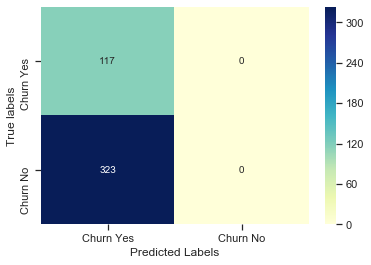

In [16]:
everyone_churn = np.ones_like(y_test)
print_confusion_matrix(y_test, everyone_churn)
plt.savefig('everyone_churn.png')

A naive classifier which always output "Yes" is not good at all as we will have to spend money on a business strategy to keep each customer in a database which is too expensive, i.e, 323 out of 440 were not churning customers but we spent money on them.

Accuracy Score: 0.7340909090909091
Recall Score: 0.0
Precision Score: 0.0
Confusion Matrix:


C:\Users\morty\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


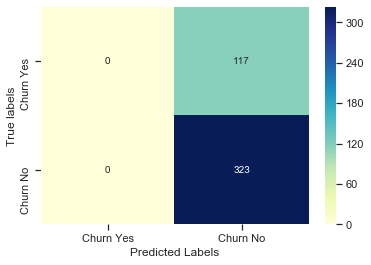

In [17]:
nobody_churn = np.zeros_like(y_test)
print_confusion_matrix(y_test, nobody_churn)
plt.savefig('nobody_churn.png')

Similarly, another classifier which always output "No" is still not good enough as our main problem stated that customer retention is less expensive than capturing new customers. With this strategy, we lose too many customers, i.e, 117 out of 440 were actually churning customers but our classifier missed to spot them. We would need to spend extra money to replace these 117 lost customers.

### 2.4 Choice of metric <a class="anchor" id="ML5"></a>

We need to decide which metric to use for our model.

The **Confusion Matrix** summarizes the test results from a supervised model. The results of a prediction from a test set, where we know the actual (true) and predicted labels are put in two axis. On one axis we have the True labels, as given by the test set, on the other, the predictions as given by the model. Here, we see the true positives (TP), true negatives (TN) - correctly predicted values - and the false positives (FP) and false negatives (FN) - incorrectly predicted values.

**Accuracy** measures how well our model predicts all the classes, regardless of balance. It is the ratio of "correctly predicted" results, versus the entire sample, defined by : (TP + TN)/(TP + TN + FP + FN)

**Precision** is the fraction of predictions that are correctly predicted. Hence, it is the probability that a (randomly selected) customer is actually about to churn : TP / (TP + FP)

**Recall** is measure the share of true values that have been correctly predicted. It is the probability that a (randomly selected) "about to Churn"-customer is retrieved in a search : TP / (TP + FN)

**F1** is the harmonic mean of Precision and Recall, usually a good metric of the balance between the two metrics.


In our scenario, **we are more interested in recall** as we want to make sure we capture as many churning customers as possible even though we may raise too many false alarms (false negative, i.e, people who don't churn) as retaining a customer is less expensive than capturing a new one. 

Of course, we do not want a naive classifier which will always says "yes" otherwise it will be too expensive to target a business strategy on each customer. Hence, we will make sure to choose a threshold such that the precision score is not too low neither.

### 2.5 Improving the classifier <a class="anchor" id="ML6"></a>

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.ticker

In [19]:
param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-1, 1, 10),
    'solver' : ['liblinear']}

clf = LogisticRegression()
gs = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=0, scoring="recall")
gs.fit(X_train, y_train)

y_score = gs.decision_function(X_valid)

precision, recall, thresholds = precision_recall_curve(y_valid, y_score)

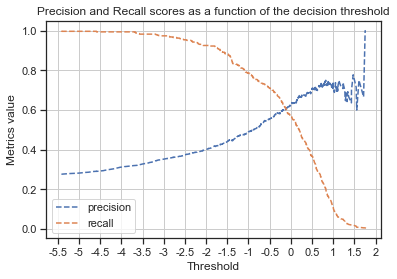

In [20]:
plt.plot(thresholds, precision[:len(precision)-1], label='precision', ls = 'dashed')
plt.plot(thresholds, recall[:len(recall)-1], label='recall', ls = 'dashed')
plt.legend()
plt.title('Precision and Recall scores as a function of the decision threshold')
plt.xlabel('Threshold')
plt.ylabel('Metrics value')
plt.grid()

#axes
ax=plt.gca()

f = lambda x,pos: str(x).rstrip('0').rstrip('.')
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(f))
plt.show()

We want the recall as high possible while making sure precision is not too low. When looking at the precision and recall curve, a threshold = -1.5 allows us to reach a score of more than 80% while making sure precision is not too low (minimum 40%).

Accuracy Score: 0.7113636363636363
Recall Score: 0.905982905982906
Precision Score: 0.4774774774774775
Confusion Matrix:


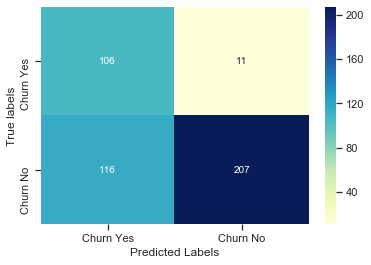

In [21]:
y_pred_threshold = (gs.decision_function(X_test) >= -1.5).astype(bool) #this computes a new set of y_pred based on a different threshold, which we set on the decision function 

print_confusion_matrix(y_test,y_pred_threshold)
plt.xlabel('Predicted Labels')
plt.ylabel('True labels')
plt.show()

Our new classifier reached a recall score of **90.60%** with a precision score of **47.75%**. It allowed us to to spot 106 out of the 117 churning customers. Hence we would only need to **spend extra money to replace 11 customers** in comparison to the previous cases.
Furthermore, 116 out of the 323 non-churning customers were classified as churning ones by our classifier which is still better than the previous model.

### 2.6 Feature Importances <a class="anchor" id="ML7"></a>

In [22]:
estimator = gs.best_estimator_
class_labels = gs.classes_
weights = estimator.coef_[0]
weights_index = np.argsort(weights)[::-1]


#take 5 most important feature in each class
weights = np.sort(weights)[::-1]

#about to churn
positive_class = weights_index[:5]
positive_feature = X_train.columns[positive_class].values
coeff_pos = weights[:5]



negative_class = weights_index[-5:][::-1]
negative_feature = X_train.columns[negative_class].values
coeff_neg = weights[-5:][::-1]


top5_class1 = list(zip(coeff_pos, positive_feature))
top5_class2 = list(zip(coeff_neg, negative_feature))

print("Most important feature used to predict churn with their weights")
print('--------------------------------------')

for w, n in top5_class1 :
    print("{} : {}".format(n, w))
    
print('-----------')
    
for w, n in top5_class2 :
    print("{} : {}".format(n, w))


Most important feature used to predict churn with their weights
--------------------------------------
TotalCharges : 2.41194855716856
InternetYes : 1.595887533016741
FiberOptic : 1.5259884507415054
StreamingTV : 0.5433665554921124
StreamingMovies : 0.4998150502828606
-----------
tenure : -3.8768426607650053
MonthlyCharges : -3.005716293889124
Contract_Two year : -1.0917173045943789
Pay_Bank transfer (automatic) : -0.4199272308407312
Pay_Credit card (automatic) : -0.4148894319496611


## 3. Saving  Churn problem ! <a class="anchor" id="BM"></a>

During the first part, we presented Telco Churn problem and gained insights regarding features that separate churning customers from loyal customers using descriptive analysis. 
In the second part, we proposed a ML model as a solution to predict Churn in order to detect potential customers about to Churn and design specific targeted strategies to keep those customers in our company.

In the following, we will get back to the business problem. 
First of all, we will use all discoveries found in the previous parts and propose strategies to Telco Company owners as a solution to keep their customers.
In the second part, we are gonna present a simple business model and determine how much money the ML tool we designed may allow Telco owners to save.

### 3.1 Program strategies <a class="anchor" id="BM2"></a>

Regarding Telco's actual business, the following may be taken into account.

- **Charges** : Low-cost customer represents a huge part of loyal ones. Even though, low charges are a proxy for loyal customers, it may be one of the most sensitive factor to change as it impacts directly the income of Telco Company. However, we noticed that customers with a partner do pay more than the others, hence it may be interesting to offer family packages with discount or goodies to justify the high prices.

- **Contracts** : We observed that most churning customers were offered short-term contract, i.e month-to-month. This is not good for Telco as it allows the customers to be always tempted by new offers from the concurrent. A solution would be to either remove these short-term contract and offer only long-term ones, or promote/value long-term contract with lower monthly charges than in short ones and create a loyalty program with bonus points. The longer you stay in the company, the higher the discount on new devices, smartphones and subscriptions.

- **Premium Services** : Internet and video-streaming services seems to be the most costly, hence the most valuable ones for the company. However, they seem to represent the most requested services by passing through tourists. It may be interesting to change their pricing as "an exchange" for loyalty. The owners may offer *significant differences in price* for Fiber optic for example depending on the type of contract you choose. It allow to balance the loss of these passing through clients (tourists), as it impossible to keep them in the business, by making a huge profit at once.


### 3.2 Simple Business model : simulation <a class="anchor" id="BM3"></a>

Let's design a simple simulation. 

**New clients strategy** : We make the assumption that for each churning customer, Telco would invest **\\$200** in Marketing, ads, targeting emails and campaings to replace him. 

**Retaining customers strategy** : On the other hand, they would invest only **\\$50** to retain a customer already in the database, by allowing him discount on some services for example.

In [23]:
print("Number of customers : %s" % y_test.shape[0])
print("Number of churning customers : %s" % sum(y_test == 1))

Number of customers : 440
Number of churning customers : 117


We compare here the three models studied earlier :
- **Nobody churn** : Our model miss 117 churning customers -> We need to capture 117 new clients.
- **Everybody churn** : We miss no customers, but we need to invest on all of them. (440)
- **Our Logit Model** : We spot 106 out of 117 churning customers, we need to replace 11 of them. Furthermore, 116 were classified as churning customers when they were not, we need to invest in them.

In [24]:
def cost(clients_to_retain, clients_to_obtain) :
    return 50*clients_to_retain + 200*clients_to_obtain

In [25]:
nobody_churn = cost(0, 117)
everyone_churn = cost(440, 0)
logit_model = cost(106, 11)

strategies = [(nobody_churn, "No action taken"), (everyone_churn, "Retain all customers"), (logit_model, "Our model")]

all_costs = pd.DataFrame(strategies, columns=["Cost ($)", "Strategy"])
all_costs.head()

,Cost ($),Strategy
0,23400,No action taken
1,22000,Retain all customers
2,7500,Our model


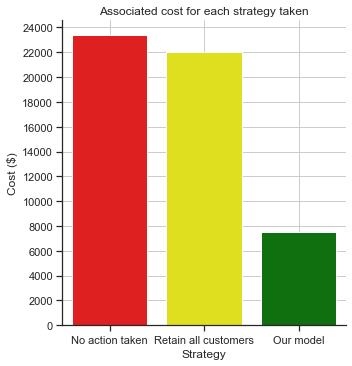

In [26]:
sns.catplot(x="Strategy", y="Cost ($)", kind="bar", data=all_costs, palette=["red", "yellow", "green"])
plt.title("Associated cost for each strategy taken")
plt.savefig("strategies_cost.png")
plt.grid()

ax=plt.gca()
f = lambda x,pos: str(x).rstrip('0').rstrip('.')
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2000))
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(f))

plt.show()

## 4. Conclusion <a class="anchor" id="Concl"></a>

During our analysis, we managed to identify key factors identifying a potential churning customers. 

We proposed a Logistic regression model with a recall at **90.60%** to minimize Telco's company cost for customer retention. 

Our strategy in comparison to the current state of affairs has allowed Telco to save **\\$15900**.